In [10]:
import re
from collections import defaultdict
import matplotlib.pyplot as plt

# 解析日志的函数
def parse_logs(log_lines):
    # 初始化存储结构
    data = defaultdict(lambda: defaultdict(list))
    current_ranging_counter = None

    # 正则表达式匹配
    ranging_ready_pattern = re.compile(r"I: Ranging data ready (\d+)")
    channel_data_pattern = re.compile(r"I: ch\[(\d+)\] : ([\-\d\.]+) radians")

    # 逐行解析日志
    for line in log_lines:
        # 检查是否是新的探测次数
        ranging_match = ranging_ready_pattern.search(line)
        if ranging_match:
            current_ranging_counter = int(ranging_match.group(1))
            continue

        # 检查是否是信道数据
        channel_match = channel_data_pattern.search(line)
        if channel_match and current_ranging_counter is not None:
            channel = int(channel_match.group(1))
            phase = float(channel_match.group(2))
            # 存储数据
            data[current_ranging_counter][channel].append(phase)

    return data

# 从文件加载日志数据
def load_log_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        log_lines = file.readlines()
    return log_lines

# 绘图函数
def plot_data(parsed_data, ranging_counter):
    if ranging_counter not in parsed_data:
        print(f"No data for ranging counter {ranging_counter}")
        return

    channels = parsed_data[ranging_counter]
    for channel, phases in channels.items():
        plt.plot([channel] * len(phases), phases, 'o', label=f"Channel {channel}")

    plt.xlabel("Channel Number")
    plt.ylabel("Phase (radians)")
    plt.title(f"Ranging Counter {ranging_counter} - Phase vs Channel")
    plt.legend()
    plt.grid()
    plt.show()

# 主函数
if __name__ == "__main__":
    # 替换为你的 txt 文件路径
    file_path = "cs15ch.txt"
    # file_path = "cs.full.ch.txt"

    # 加载日志文件
    log_lines = load_log_file(file_path)

    # 解析日志数据
    parsed_data = parse_logs(log_lines)

    # 打印解析结果
    for ranging_counter, channels in parsed_data.items():
        print(f"Ranging Counter: {ranging_counter}")
        for channel, phases in channels.items():
            print(f"  Channel {channel}: {phases}")

    # # 绘制第 0 次信道探测的结果
    # plot_data(parsed_data, ranging_counter=0)

    # # 绘制第 1 次信道探测的结果
    # plot_data(parsed_data, ranging_counter=1)

Ranging Counter: 0
  Channel 2: [-0.169555, -0.088853, -0.155103, -0.188221, -0.212076]
  Channel 5: [-0.526596, -0.486639, -0.420602, -0.490927, -0.445693]
  Channel 8: [-0.785945, -0.707448, -0.756801, -0.810321, -0.818436]
  Channel 11: [-1.159637, -1.227444, -1.220578, -1.183199, -1.20838]
  Channel 14: [-1.527483, -1.580123, -1.611525, -1.503842, -1.531663]
  Channel 17: [-1.88147, -1.827042, -1.913896, -1.868207, -1.838076]
  Channel 20: [-1.79482, -1.993878, -1.844945, -1.843017, -1.831157]
  Channel 26: [-1.217986, -1.235268, -1.287993, -1.279128, -1.269359]
  Channel 29: [-0.526202, -0.573349, -0.535594, -0.605943, -0.58549]
  Channel 32: [-0.081384, -0.031904, -0.001734, -0.154786, -0.038576]
  Channel 35: [-0.302334, -0.419266, -0.280642, -0.431805, -0.401116]
  Channel 38: [-0.606566, -0.648798, -0.658681, -0.647849, -0.579862]
  Channel 41: [-0.553526, -0.665816, -0.589933, -0.631164, -0.593384]
  Channel 44: [-0.655756, -0.628882, -0.631191, -0.639718, -0.728971]
  Channe

Channel 23 not found in the data.


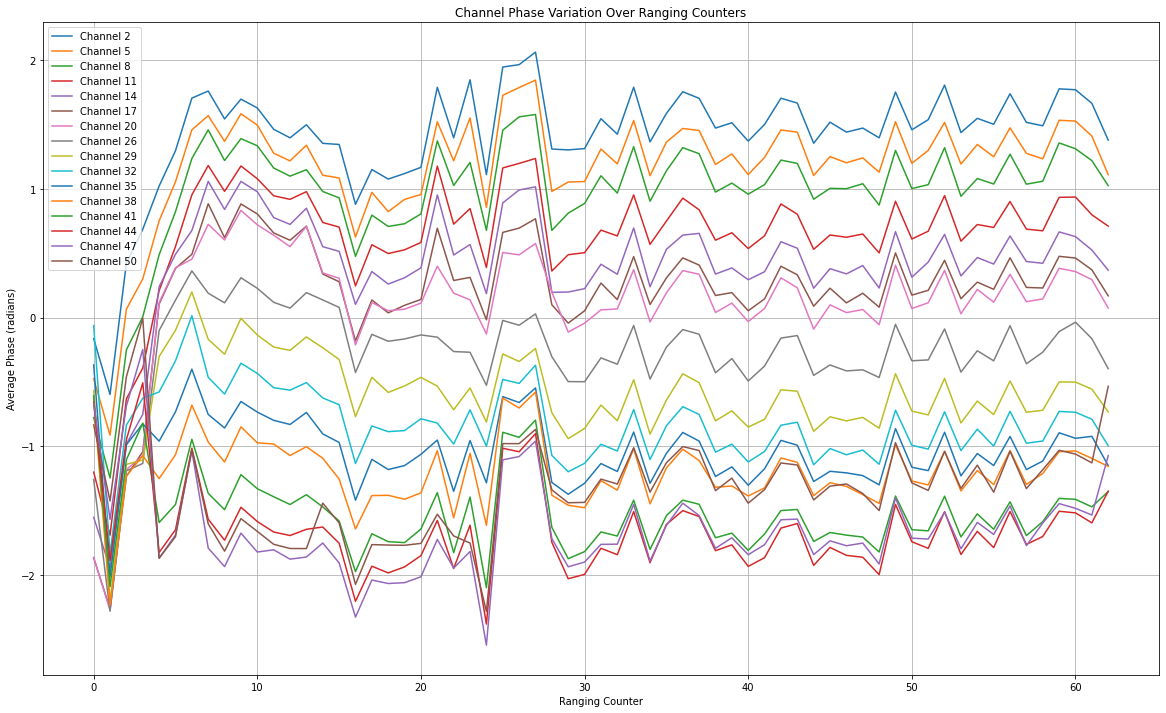

In [11]:
# 计算信道平均相位值的函数
def calculate_channel_averages(parsed_data):
    channel_averages = defaultdict(list)  # 每个信道的平均相位值列表

    # 遍历每次信道探测的结果
    for ranging_counter, channels in parsed_data.items():
        for channel, phases in channels.items():
            # 计算均值并保存
            average_phase = sum(phases) / len(phases)
            channel_averages[channel].append((ranging_counter, average_phase))

    return channel_averages

# 绘制信道变化曲线的函数
def plot_channel_variation(channel_averages, channels_to_plot):
    plt.figure(figsize=(20, 12))

    for channel in channels_to_plot:
        if channel in channel_averages:
            data = channel_averages[channel]
            ranging_counters = [item[0] for item in data]  # 信道探测次数
            average_phases = [item[1] for item in data]    # 平均相位值
            plt.plot(ranging_counters, average_phases, label=f"Channel {channel}")
        else:
            print(f"Channel {channel} not found in the data.")

    plt.xlabel("Ranging Counter")
    plt.ylabel("Average Phase (radians)")
    plt.title("Channel Phase Variation Over Ranging Counters")
    plt.legend()
    plt.grid()
    plt.show()


# 计算每个信道的平均相位值
channel_averages = calculate_channel_averages(parsed_data)

# 指定要绘制的信道
# channels_to_plot = [2, 10, 20, 30, 40, 50, 60, 70, 76]  # 你可以修改为需要展示的信道
channels_to_plot = [2,  5,  8,  11, 14, 17, 20, 23, 26, 29, 32,35, 38, 41, 44, 47, 50]  # 你可以修改为需要展示的信道

plot_channel_variation(channel_averages, channels_to_plot)